In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import hddm
print hddm.__version__

import kabuki
print kabuki.__version__

0.6.0
0.6.1


C:\ProgramData\Anaconda3\envs\ddm\lib\site-packages\IPython\parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [4]:
data = hddm.load_csv('./hddm_input.csv')
data.head(10)

,response,rt,subj_idx,stimulus_index
0,1,0.033333,6,1
1,0,2.600000,6,1
2,1,0.033333,6,1
3,1,0.100000,6,1
4,1,2.633333,6,1
5,1,1.266667,6,1
6,1,1.366667,41,1
7,1,0.033333,46,1
8,0,2.100000,59,1
9,1,1.500000,62,1


Text(0.04,0.5,'count')

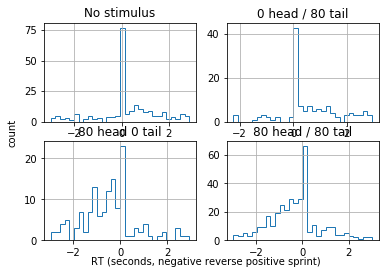

In [21]:
data = hddm.utils.flip_errors(data)

label_texts = ['','No stimulus','0 head / 80 tail','80 head 0 tail','80 head / 80 tail']

fig = plt.figure()
for i, subj_data in data.groupby('stimulus_index'):
    ax = fig.add_subplot(2,2,i,title=label_texts[i])
    subj_data.rt.hist(bins=30, histtype='step', ax=ax)
    
fig.text(0.5, 0.04, 'RT (seconds, negative reverse positive sprint)', ha='center')
fig.text(0.04, 0.5, 'count', va='center', rotation='vertical')
#plt.savefig('hddm_demo_fig_00.pdf')

In [22]:
# Instantiate model object passing it our data (no need to call flip_errors() before passing it).
# This will tailor an individual hierarchical DDM around your dataset.
m = hddm.HDDM(data)
# find a good starting point which helps with the convergence.
m.find_starting_values()
# start drawing 7000 samples and discarding 5000 as burn-in
m.sample(2000, burn=20)

C:\ProgramData\Anaconda3\envs\ddm\lib\site-packages\scipy\optimize\optimize.py:1934: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
C:\ProgramData\Anaconda3\envs\ddm\lib\site-packages\scipy\optimize\optimize.py:1935: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1


 [-----------------100%-----------------] 2001 of 2000 complete in 1441.2 sec

In [23]:
stats = m.gen_stats()
stats[stats.index.isin(['a', 'a_std', 'a_subj.0', 'a_subj.1'])]

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,1.64268,0.147981,1.34036,1.55769,1.64345,1.73074,1.92543,0.0119104
a_std,1.69778,0.431213,0.63436,1.58226,1.8317,1.96553,2.23436,0.0418144
a_subj.1,0.792454,0.364136,0.165142,0.537894,0.748513,0.993502,1.65735,0.0175328


Plotting a
Plotting a_std
Plotting v
Plotting t


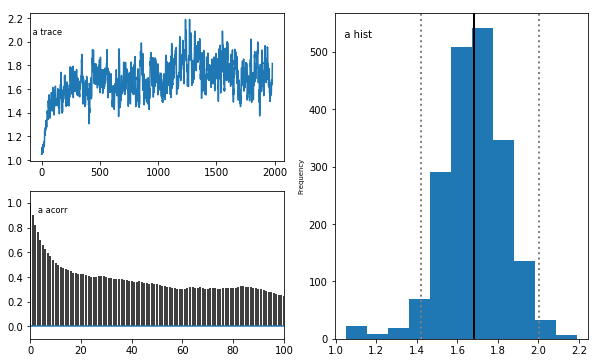

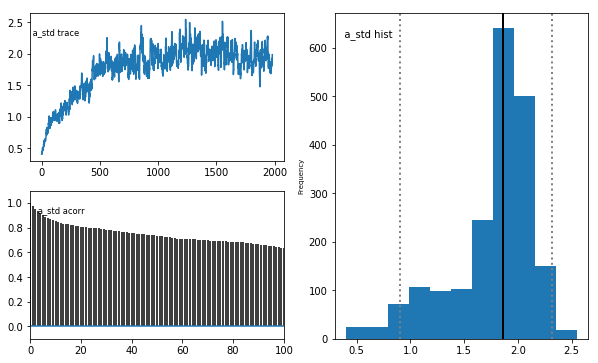

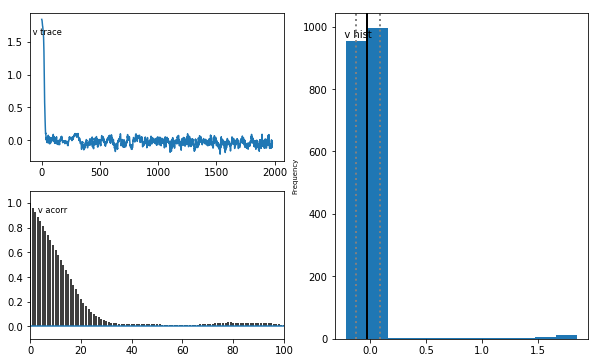

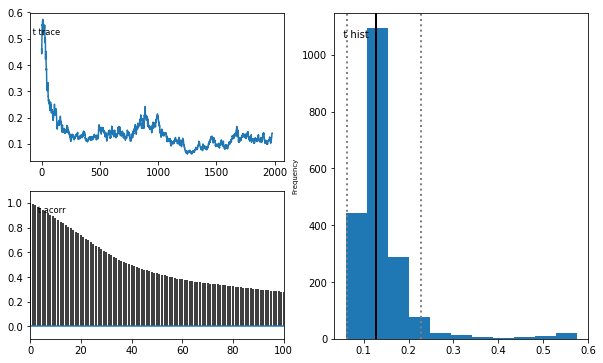

In [42]:
m.plot_posteriors(['a', 't', 'v', 'a_std'])
